# Image Classification with CNN - LeNet5 architecture

In this exercise, we will apply the LeNet5 algorithm to the Fashion MNIST dataset and improve your performances.

We will first download the data:

In [16]:
# TODO: Load the dataset
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# # If your computer is slow, try to use a subset of data, e.g.
# X_train = X_train[:10000]
# y_train = y_train[:10000]
# X_test = X_test[:2000]
# y_test = y_test[:2000]
X_train.shape

(60000, 28, 28)

As you already know, this dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

You can have a look at some images if needed, even if you already know them.

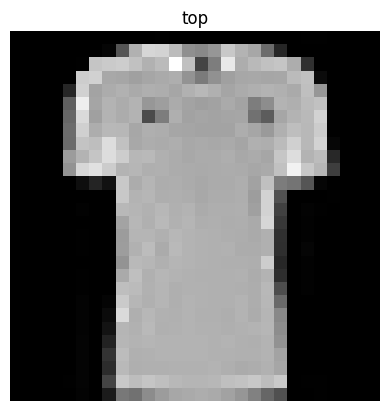

In [17]:
# TODO: Explore the data, display some input images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap='gray')
plt.title(label_class[y_train[idx]])
plt.axis('off')
plt.show()

Make the data preparation and preprocessing: scale and reshape the data, put the labels to the good shape.

In [18]:
# TODO: Make the data preparation
from tensorflow.keras.utils import to_categorical

X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

X_train_norm = np.expand_dims(X_train_norm, axis=-1)
X_test_norm = np.expand_dims(X_test_norm, axis=-1)

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print(X_train_norm.shape) # expected outcome: (60000, 28, 28, 1)

(60000, 28, 28, 1)


Now build the LeNet5 architecture. You can reuse the one of the course, or try to build it by yourself.

The architecture is the following:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1WteTU2FPIVMkBKmMxGpFm5OjsX-szTbB">
</p>

In [19]:
# TODO: Build your model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense

def lenet5():
    
    model = Sequential()

    model.add(Conv2D(filters=6, name='C1', kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    
    model.add(MaxPooling2D(pool_size=(2, 2), name='S2'))
    
    model.add(Conv2D(filters=16, name='C3', kernel_size=(3, 3), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2), name='S4'))
    
    model.add(Flatten())
    
    model.add(Dense(units=120, name='C5', activation='relu'))
    
    model.add(Dense(units=84, name='F6', activation='relu'))
    
    model.add(Dense(units=10, activation = 'softmax'))
    
    return model


Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [20]:
# TODO: Compile and fit your model
import os

# os.environ['KMP_DUPLICATE_LIB_OK']='True' #https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

model = lenet5()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


callbacks = [EarlyStopping(monitor='val_loss', patience=10)]


model.fit(x=X_train_norm, y=y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=100, batch_size=2048, callbacks=callbacks)

Epoch 1/100
30/30 [==============================] - 3s 25ms/step - loss: 1.6185 - accuracy: 0.4733 - val_loss: 0.9291 - val_accuracy: 0.6568
Epoch 2/100
30/30 [==============================] - 0s 14ms/step - loss: 0.7651 - accuracy: 0.7230 - val_loss: 0.6988 - val_accuracy: 0.7445
Epoch 3/100
30/30 [==============================] - 0s 12ms/step - loss: 0.6343 - accuracy: 0.7632 - val_loss: 0.6135 - val_accuracy: 0.7734
Epoch 4/100
30/30 [==============================] - 0s 13ms/step - loss: 0.5641 - accuracy: 0.7876 - val_loss: 0.5626 - val_accuracy: 0.7916
Epoch 5/100
30/30 [==============================] - 0s 13ms/step - loss: 0.5209 - accuracy: 0.8065 - val_loss: 0.5293 - val_accuracy: 0.8027
Epoch 6/100
30/30 [==============================] - 0s 12ms/step - loss: 0.4904 - accuracy: 0.8182 - val_loss: 0.4972 - val_accuracy: 0.8132
Epoch 7/100
30/30 [==============================] - 0s 11ms/step - loss: 0.4644 - accuracy: 0.8298 - val_loss: 0.4743 - val_accuracy: 0.8264
Epoch 

Have a look at the tensorboard and see if it gives a deeper understanding of your model.

Compute then the accuracy of your model. Is it better than a regular MLP used before?

In [21]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size = 1024
y_pred_train = to_categorical(model.predict(X_train_norm).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test_norm).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test_cat))

313/313 [==============================] - 1s 2ms/step
accuracy on train with NN: 0.9263166666666667
accuracy on test with NN: 0.8987


We will now add image augmentation to improve our results, especially we will try to reduce overfitting this way.

To do so, you can use `ImageDataGenerator` from Keras that makes all the work for you (including rescaling), with the following parameter: 
* `horizontal_flip=True`

For more info about how the `ImageDataGenerator` works, you can check out [this article](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/).

Begin by creating an object `ImageDataGenerator` with this parameter.

In [22]:
# TODO: Instantiate an ImageDataGenerator object
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True)

Finally, you can train your model using this generator, with the method `fit_generator` of your model and the method `flow` of your `ImageDataGenerator`.

In [23]:
# TODO: train your model
batch_size = 1024
model.fit_generator(datagen.flow(X_train_norm, y_train_cat, batch_size=batch_size),
                    validation_data=(X_test_norm, y_test_cat), callbacks=callbacks,
                    steps_per_epoch=len(X_train_norm) / batch_size, epochs=100)

Epoch 1/100


<ipython-input-23-5da9cbf7d7d8>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train_norm, y_train_cat, batch_size=batch_size),


58/58 [==============================] - 3s 44ms/step - loss: 0.4208 - accuracy: 0.8612 - val_loss: 0.3135 - val_accuracy: 0.8868
Epoch 2/100
58/58 [==============================] - 3s 48ms/step - loss: 0.2888 - accuracy: 0.8957 - val_loss: 0.2967 - val_accuracy: 0.8940
Epoch 3/100
58/58 [==============================] - 3s 60ms/step - loss: 0.2708 - accuracy: 0.9006 - val_loss: 0.2997 - val_accuracy: 0.8921
Epoch 4/100
58/58 [==============================] - 4s 60ms/step - loss: 0.2590 - accuracy: 0.9047 - val_loss: 0.2930 - val_accuracy: 0.8950
Epoch 5/100
58/58 [==============================] - 3s 53ms/step - loss: 0.2576 - accuracy: 0.9050 - val_loss: 0.2942 - val_accuracy: 0.8964
Epoch 6/100
58/58 [==============================] - 3s 50ms/step - loss: 0.2531 - accuracy: 0.9069 - val_loss: 0.2905 - val_accuracy: 0.8991
Epoch 7/100
58/58 [==============================] - 3s 43ms/step - loss: 0.2513 - accuracy: 0.9075 - val_loss: 0.2942 - val_accuracy: 0.8933
Epoch 8/100
58/58 

Recompute the accuracy of your model, does it improve your performances with data augmentation?

In [24]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size=1024
y_pred_train = to_categorical(model.predict(X_train_norm).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test_norm).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test_cat))

313/313 [==============================] - 1s 2ms/step
accuracy on train with NN: 0.9371166666666667
accuracy on test with NN: 0.9029


You can now try to improve even more your results. For example, add more parameters to your `ImageDataGenerator`, play with some hyperparameters, and so on...